## Waste Management using CNN Model

In [1]:
import kagglehub #you may have to pip install that!

path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:04<00:00, 91.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
pip install opencv-python

In [3]:
pip install tensorflow

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


In [5]:
train_path = '/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN'
test_path = '/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST'

In [6]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 12565/12565 [00:06<00:00, 1900.81it/s]


In [8]:
data.shape

(22564, 2)

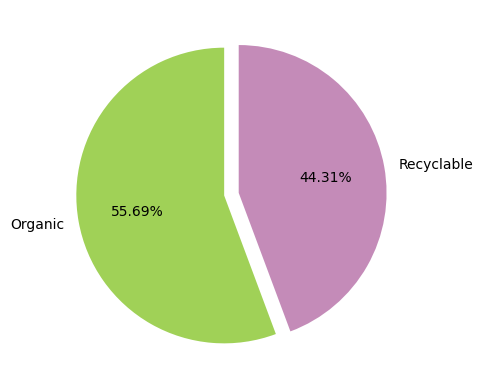

In [9]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels = ['Organic', 'Recyclable'], autopct = '%0.2f%%',
         colors = colors, startangle = 90, explode = [0.05, 0.05])
plt.show()

                                               image label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
1  [[[221, 220, 192], [221, 220, 192], [221, 220,...     R
2  [[[127, 125, 128], [128, 126, 129], [128, 126,...     R
3  [[[250, 244, 248], [249, 243, 247], [249, 243,...     R
4  [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
label
O    12565
R     9999
Name: count, dtype: int64


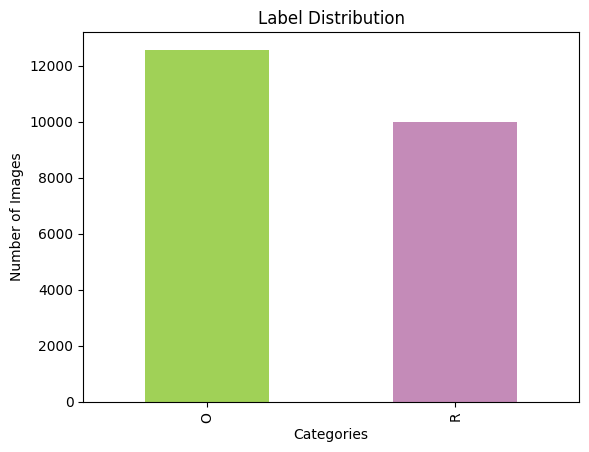

In [10]:
#Self
# Check the first few rows of the DataFrame
print(data.head())

# Check the distribution of the labels
print(data['label'].value_counts())

# Plot the distribution of labels as a bar chart
data['label'].value_counts().plot(kind='bar', color=['#a0d157', '#c48bb8'])
plt.title('Label Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.show()


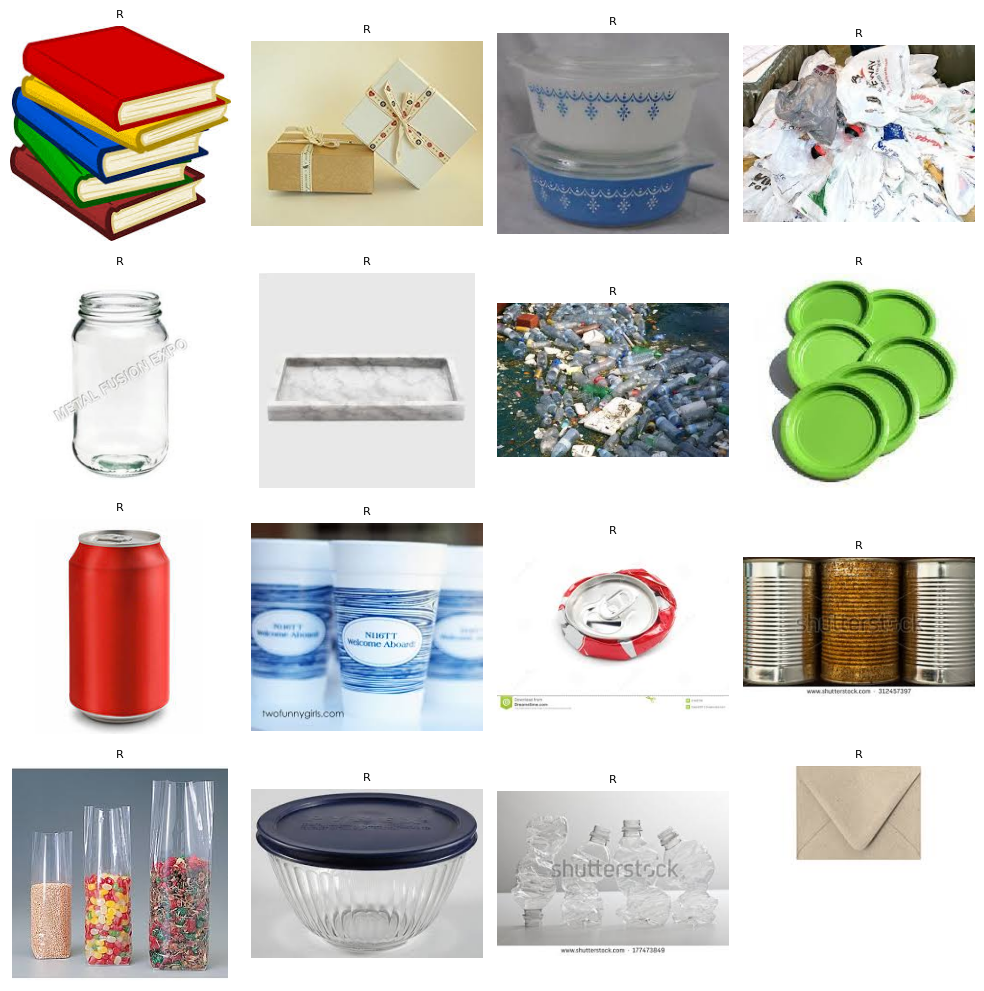

In [11]:
#Self
import matplotlib.pyplot as plt

# Display a grid of 16 images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_data[i])
    plt.title(y_data[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


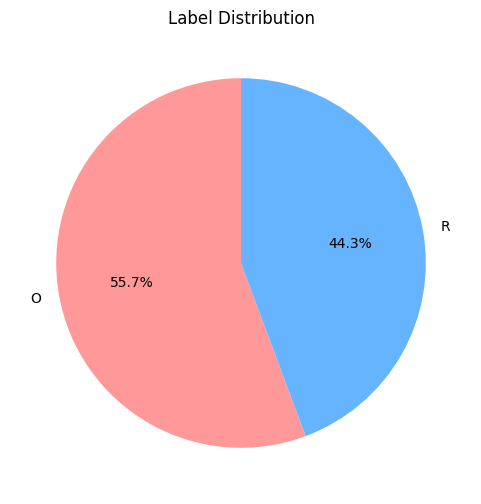

In [12]:
#Self
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
data['label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    figsize=(6, 6)
)
plt.title('Label Distribution')
plt.ylabel('')  # Remove the y-axis label for aesthetics
plt.show()

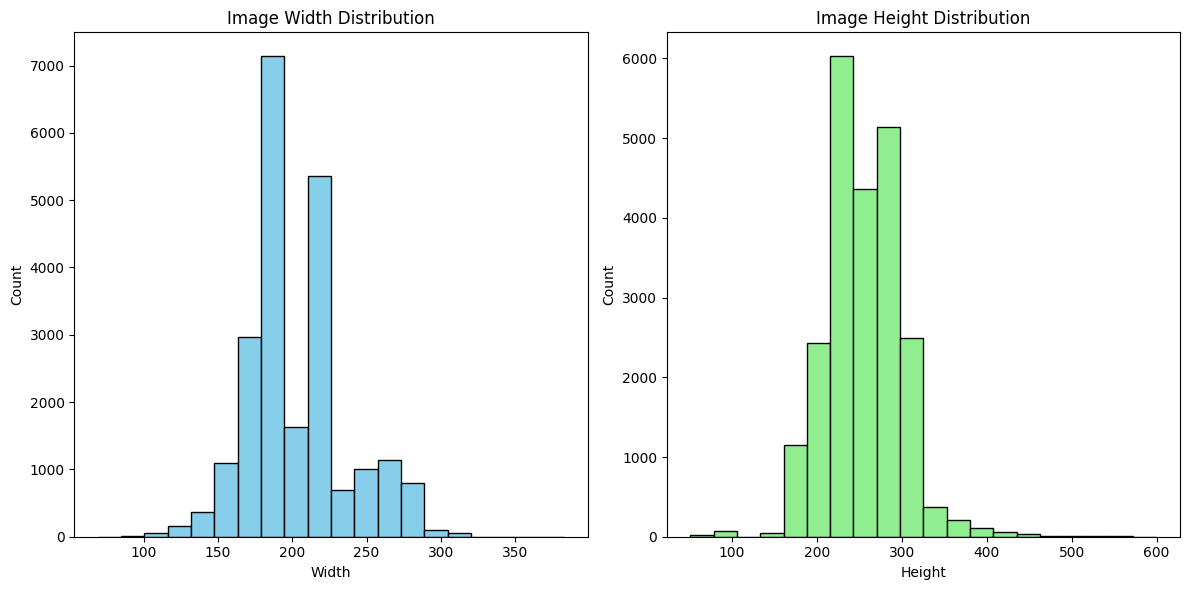

In [13]:
#Self
image_shapes = [img.shape[:2] for img in data['image']]
widths, heights = zip(*image_shapes)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


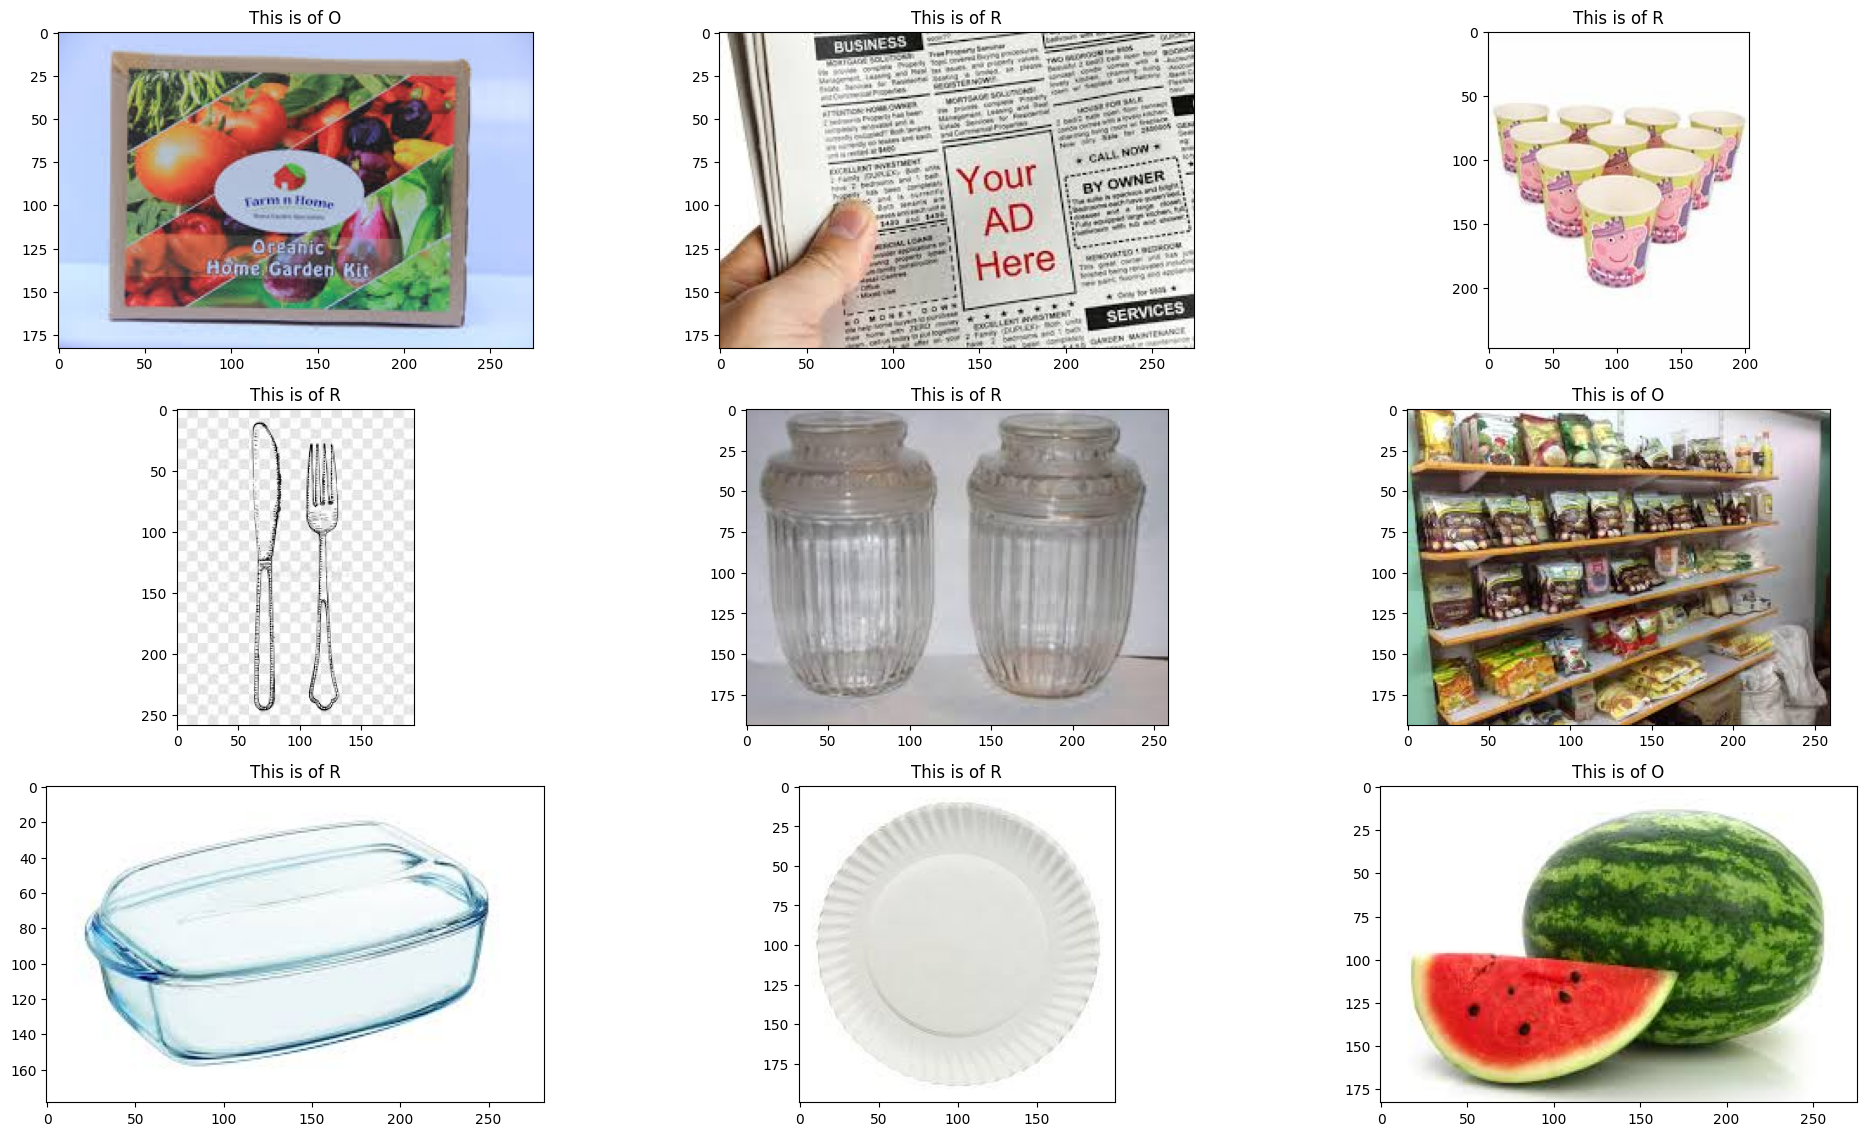

In [14]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [32]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
batch_size = 64


In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [37]:
hist = model.fit(
    train_generator,
    epochs = 15,
    validation_data = test_generator)

Epoch 1/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 68s 162ms/step - accuracy: 0.7639 - loss: 0.5693 - val_accuracy: 0.8484 - val_loss: 0.3585
Epoch 2/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 70s 152ms/step - accuracy: 0.8448 - loss: 0.3854 - val_accuracy: 0.8882 - val_loss: 0.2845
Epoch 3/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 146ms/step - accuracy: 0.8621 - loss: 0.3480 - val_accuracy: 0.9025 - val_loss: 0.2751
Epoch 4/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 55s 154ms/step - accuracy: 0.8769 - loss: 0.3173 - val_accuracy: 0.9037 - val_loss: 0.2569
Epoch 5/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.8937 - loss: 0.2721 - val_accuracy: 0.9081 - val_loss: 0.2649
Epoch 6/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 80s 147ms/step - accuracy: 0.9119 - loss: 0.2333 - val_accuracy: 0.9045 - val_loss: 0.2845
Epoch 7/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.9340 - loss: 0.1746 - val_accuracy: 0.9121 - val_loss: 0.3211
Epoch 8/15
353/353 ━━━━━━━━━━━━━━━━━━━━ 54s 152ms/step - accuracy: 0.9506 - loss: 0

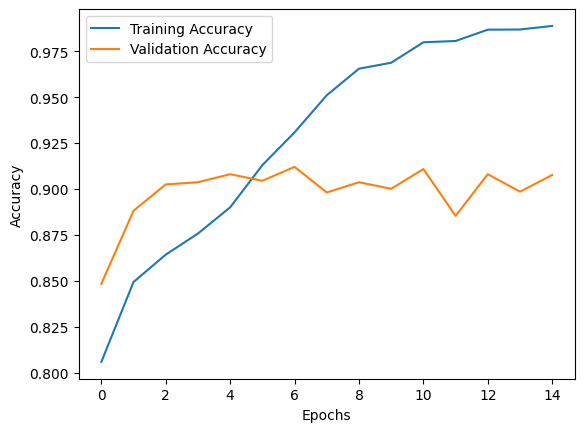

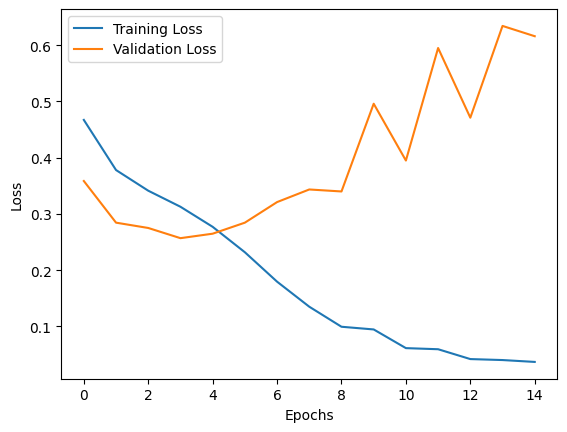

In [48]:
#Self
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [49]:
#Self
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.60      0.58      1401
           1       0.44      0.40      0.42      1112

    accuracy                           0.51      2513
   macro avg       0.50      0.50      0.50      2513
weighted avg       0.51      0.51      0.51      2513

Confusion Matrix:
 [[845 556]
 [670 442]]


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step


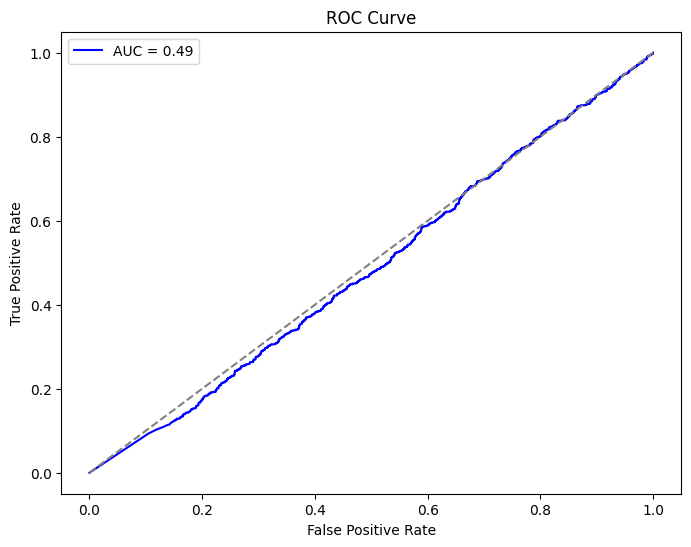

In [50]:
#Self
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model.predict(test_generator)[:, 1]  # Get probability scores
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [54]:
import numpy as np
import tensorflow.keras.backend as K

def get_model_memory_size(model):
    trainable_params = np.sum([np.prod(p.shape) for p in model.trainable_weights])
    non_trainable_params = np.sum([np.prod(p.shape) for p in model.non_trainable_weights])
    total_size = (trainable_params + non_trainable_params) * 4 / (1024 ** 2)  # Convert bytes to MB
    return f"Model Memory Size: {total_size:.2f} MB"

print(get_model_memory_size(model))

Model Memory Size: 84.92 MB


In [55]:
import pandas as pd

history_df = pd.DataFrame(hist.history)
history_df.to_csv('training_history.csv', index=False)
print("Training history saved to training_history.csv")

Training history saved to training_history.csv


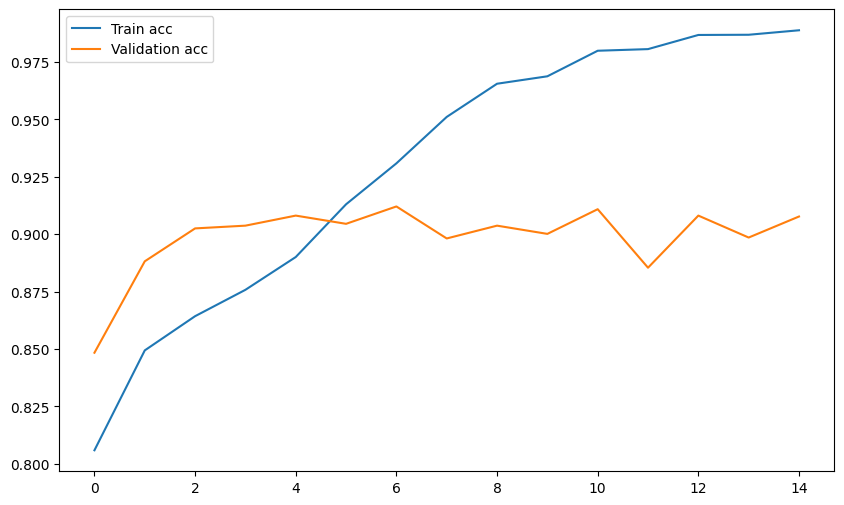

In [56]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

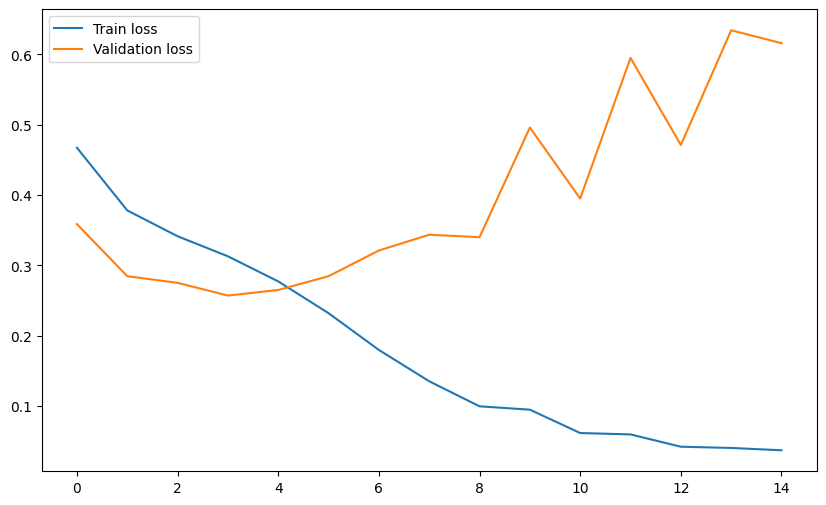

In [57]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [58]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
This image shows organic waste


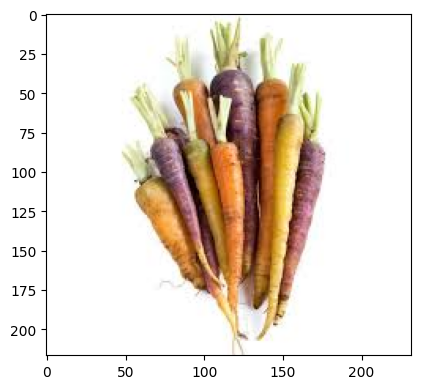

In [59]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_12574.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
This image shows recyclable waste


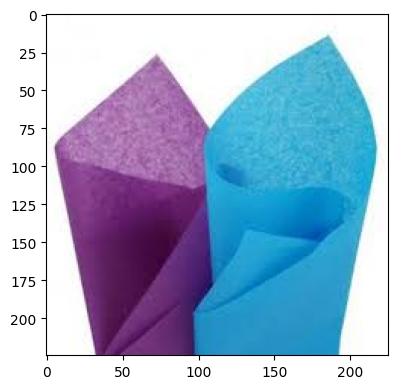

In [60]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

In [63]:
pip install streamlit tensorflow opencv-python numpy pillow

  Using cached streamlit-1.42.0-py2.py3-none-any.whl.metadata (8.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [65]:
model.save("best_model.h5")

In [66]:
import os
print(os.listdir())  # This will show all files in your working directory

['.config', 'best_model.h5', 'training_history.csv', 'sample_data']


In [73]:
!pip install streamlit
!pip install pyngrok
!pip install tensorflow opencv-python pillow numpy

In [74]:
%%writefile app.py
import streamlit as st
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image

# Load the trained model
@st.cache_data
def load_model():
    model = tf.keras.models.load_model("best_model.h5")  # Ensure the model exists
    return model

model = load_model()

# Function to make predictions
def predict_waste(image):
    img = np.array(image)
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, (1, 224, 224, 3)) / 255.0  # Normalize
    result = np.argmax(model.predict(img))
    if result == 0:
        return "♻️ This is Recyclable Waste"
    else:
        return "🍂 This is Organic Waste"

# Streamlit UI
st.title("🗑️ Waste Classification using CNN")
st.write("Upload an image to classify it as **Recyclable Waste** or **Organic Waste**")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image", use_column_width=True)
    st.write("Classifying...")
    prediction = predict

Writing app.py
